TP DE MACHINE LEARNING !!!

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [34]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [35]:
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['residual sugar'] = np.log(df['residual sugar'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])

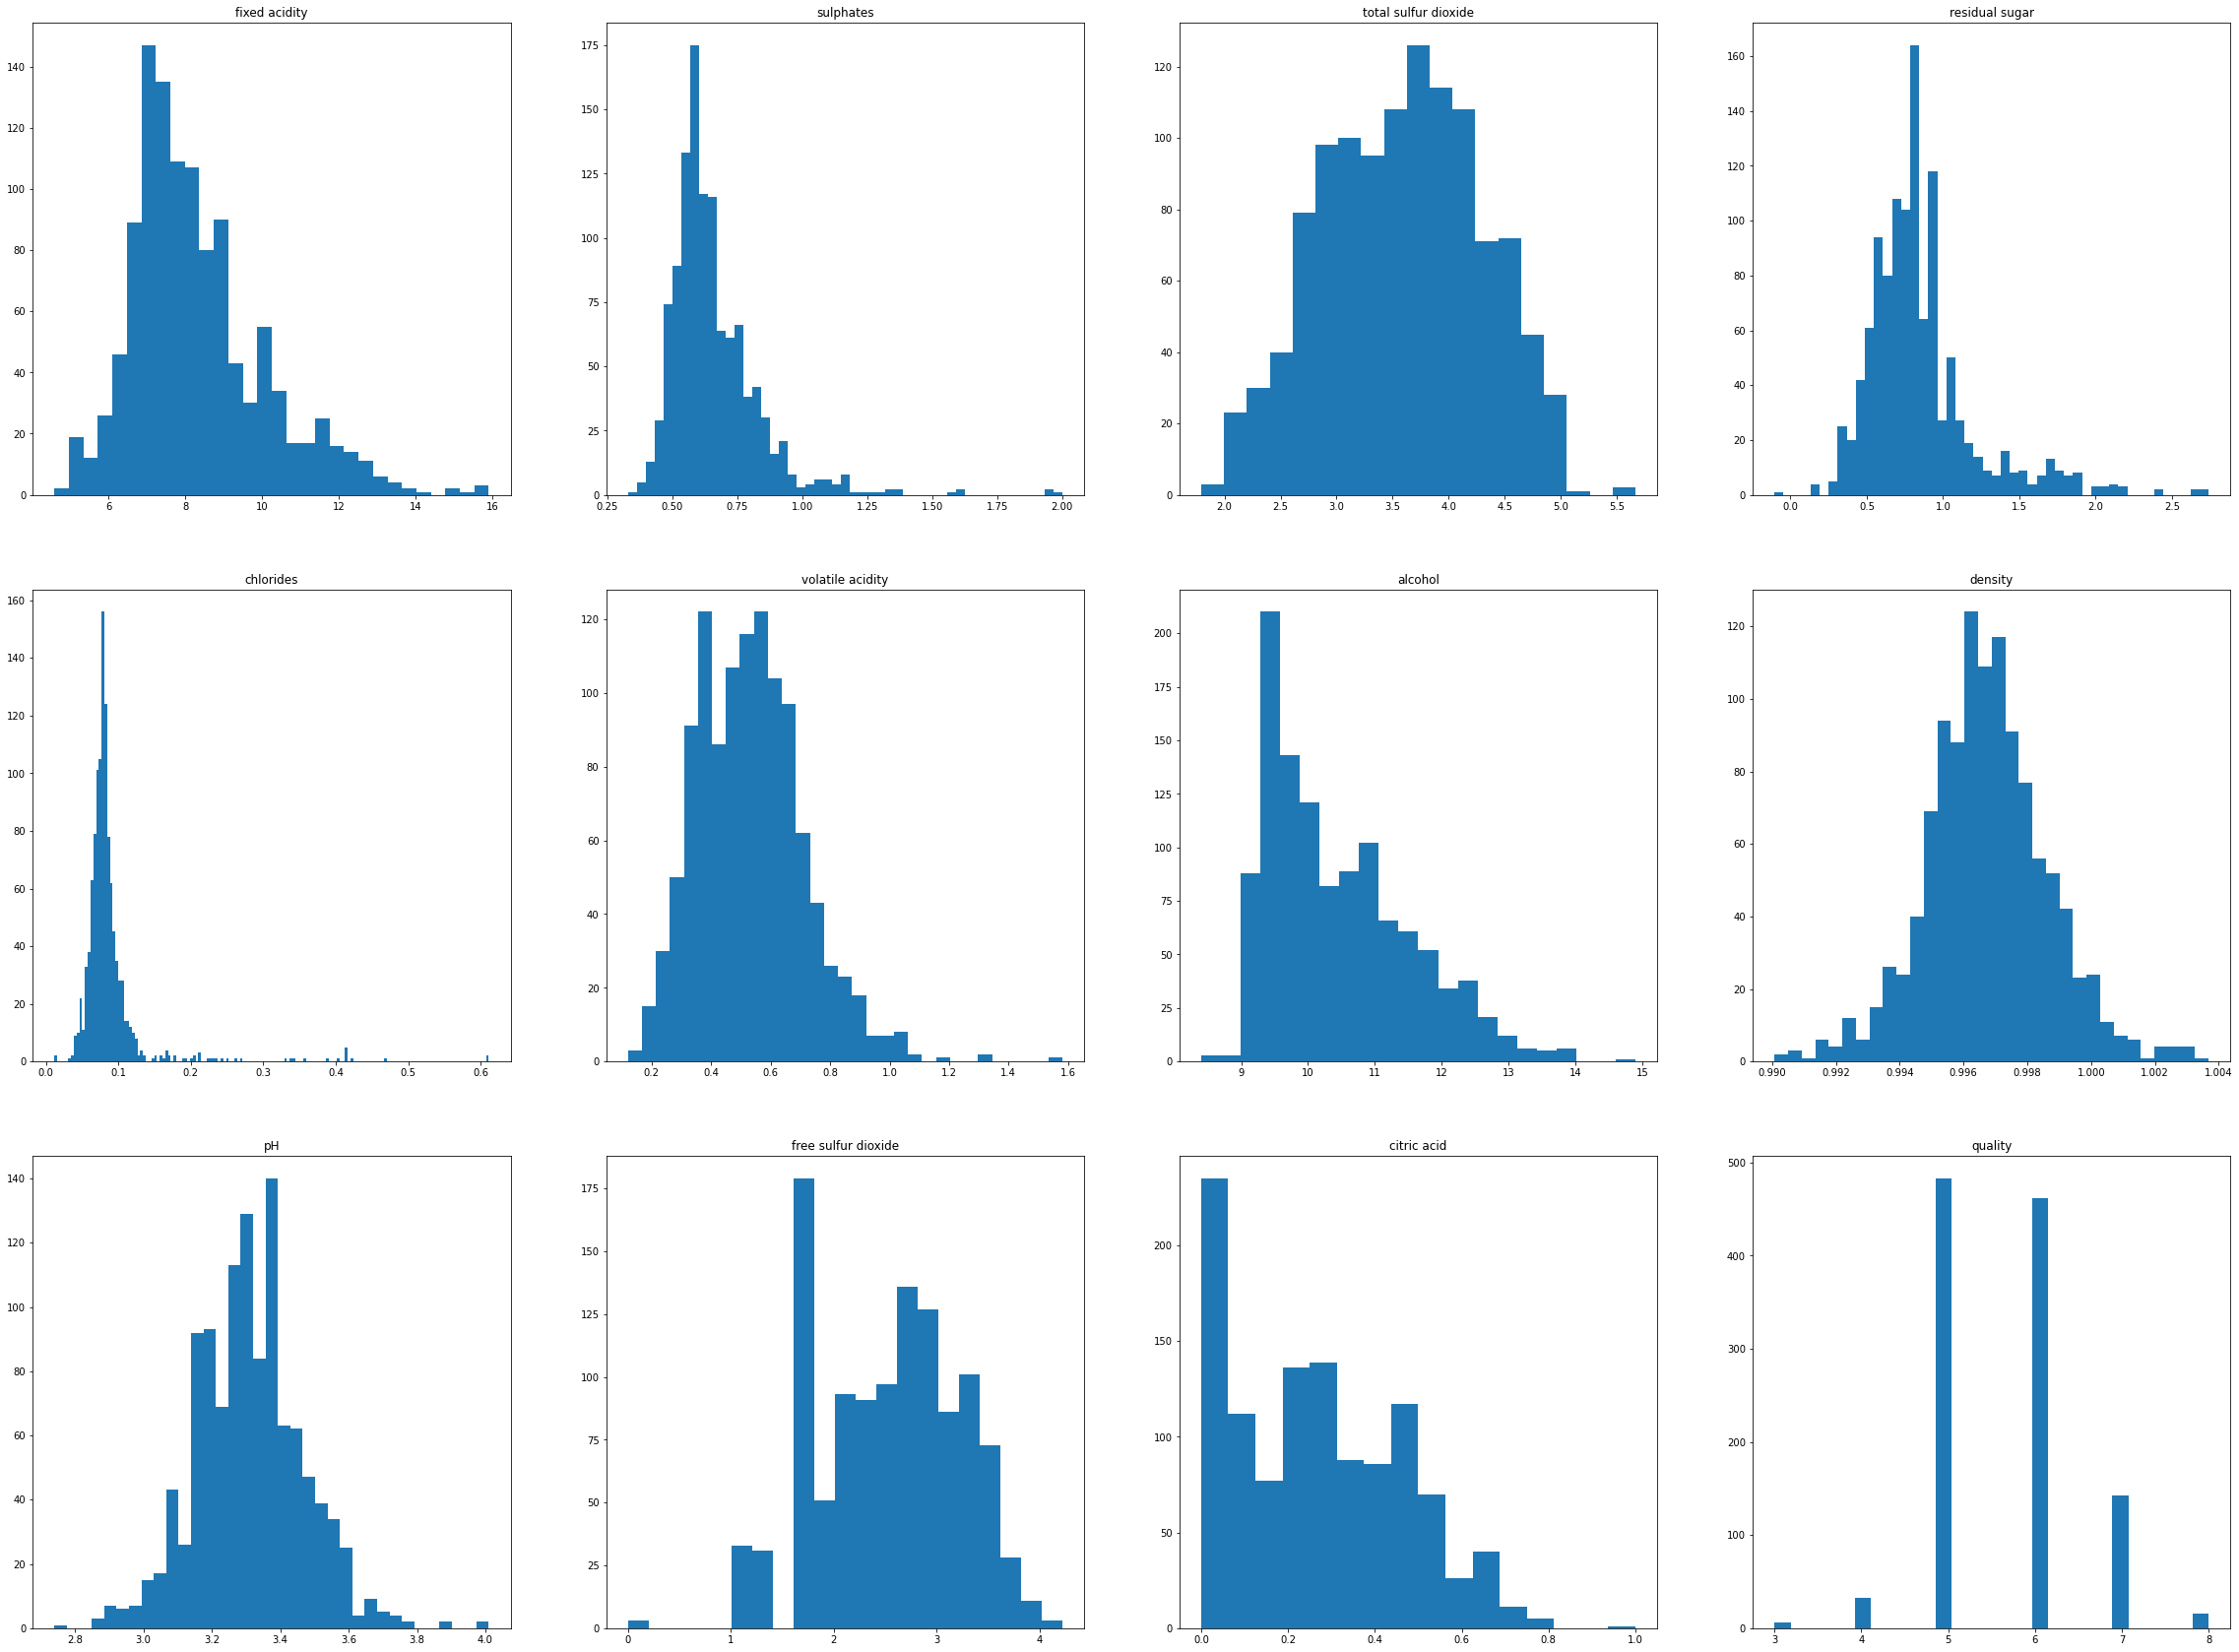

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(40, 30))
for n in range(12):
    i = n % 3
    j = n % 4
    ax[i, j].hist(df.iloc[:, n], bins='auto')
    ax[i, j].set_title(df.columns[n])

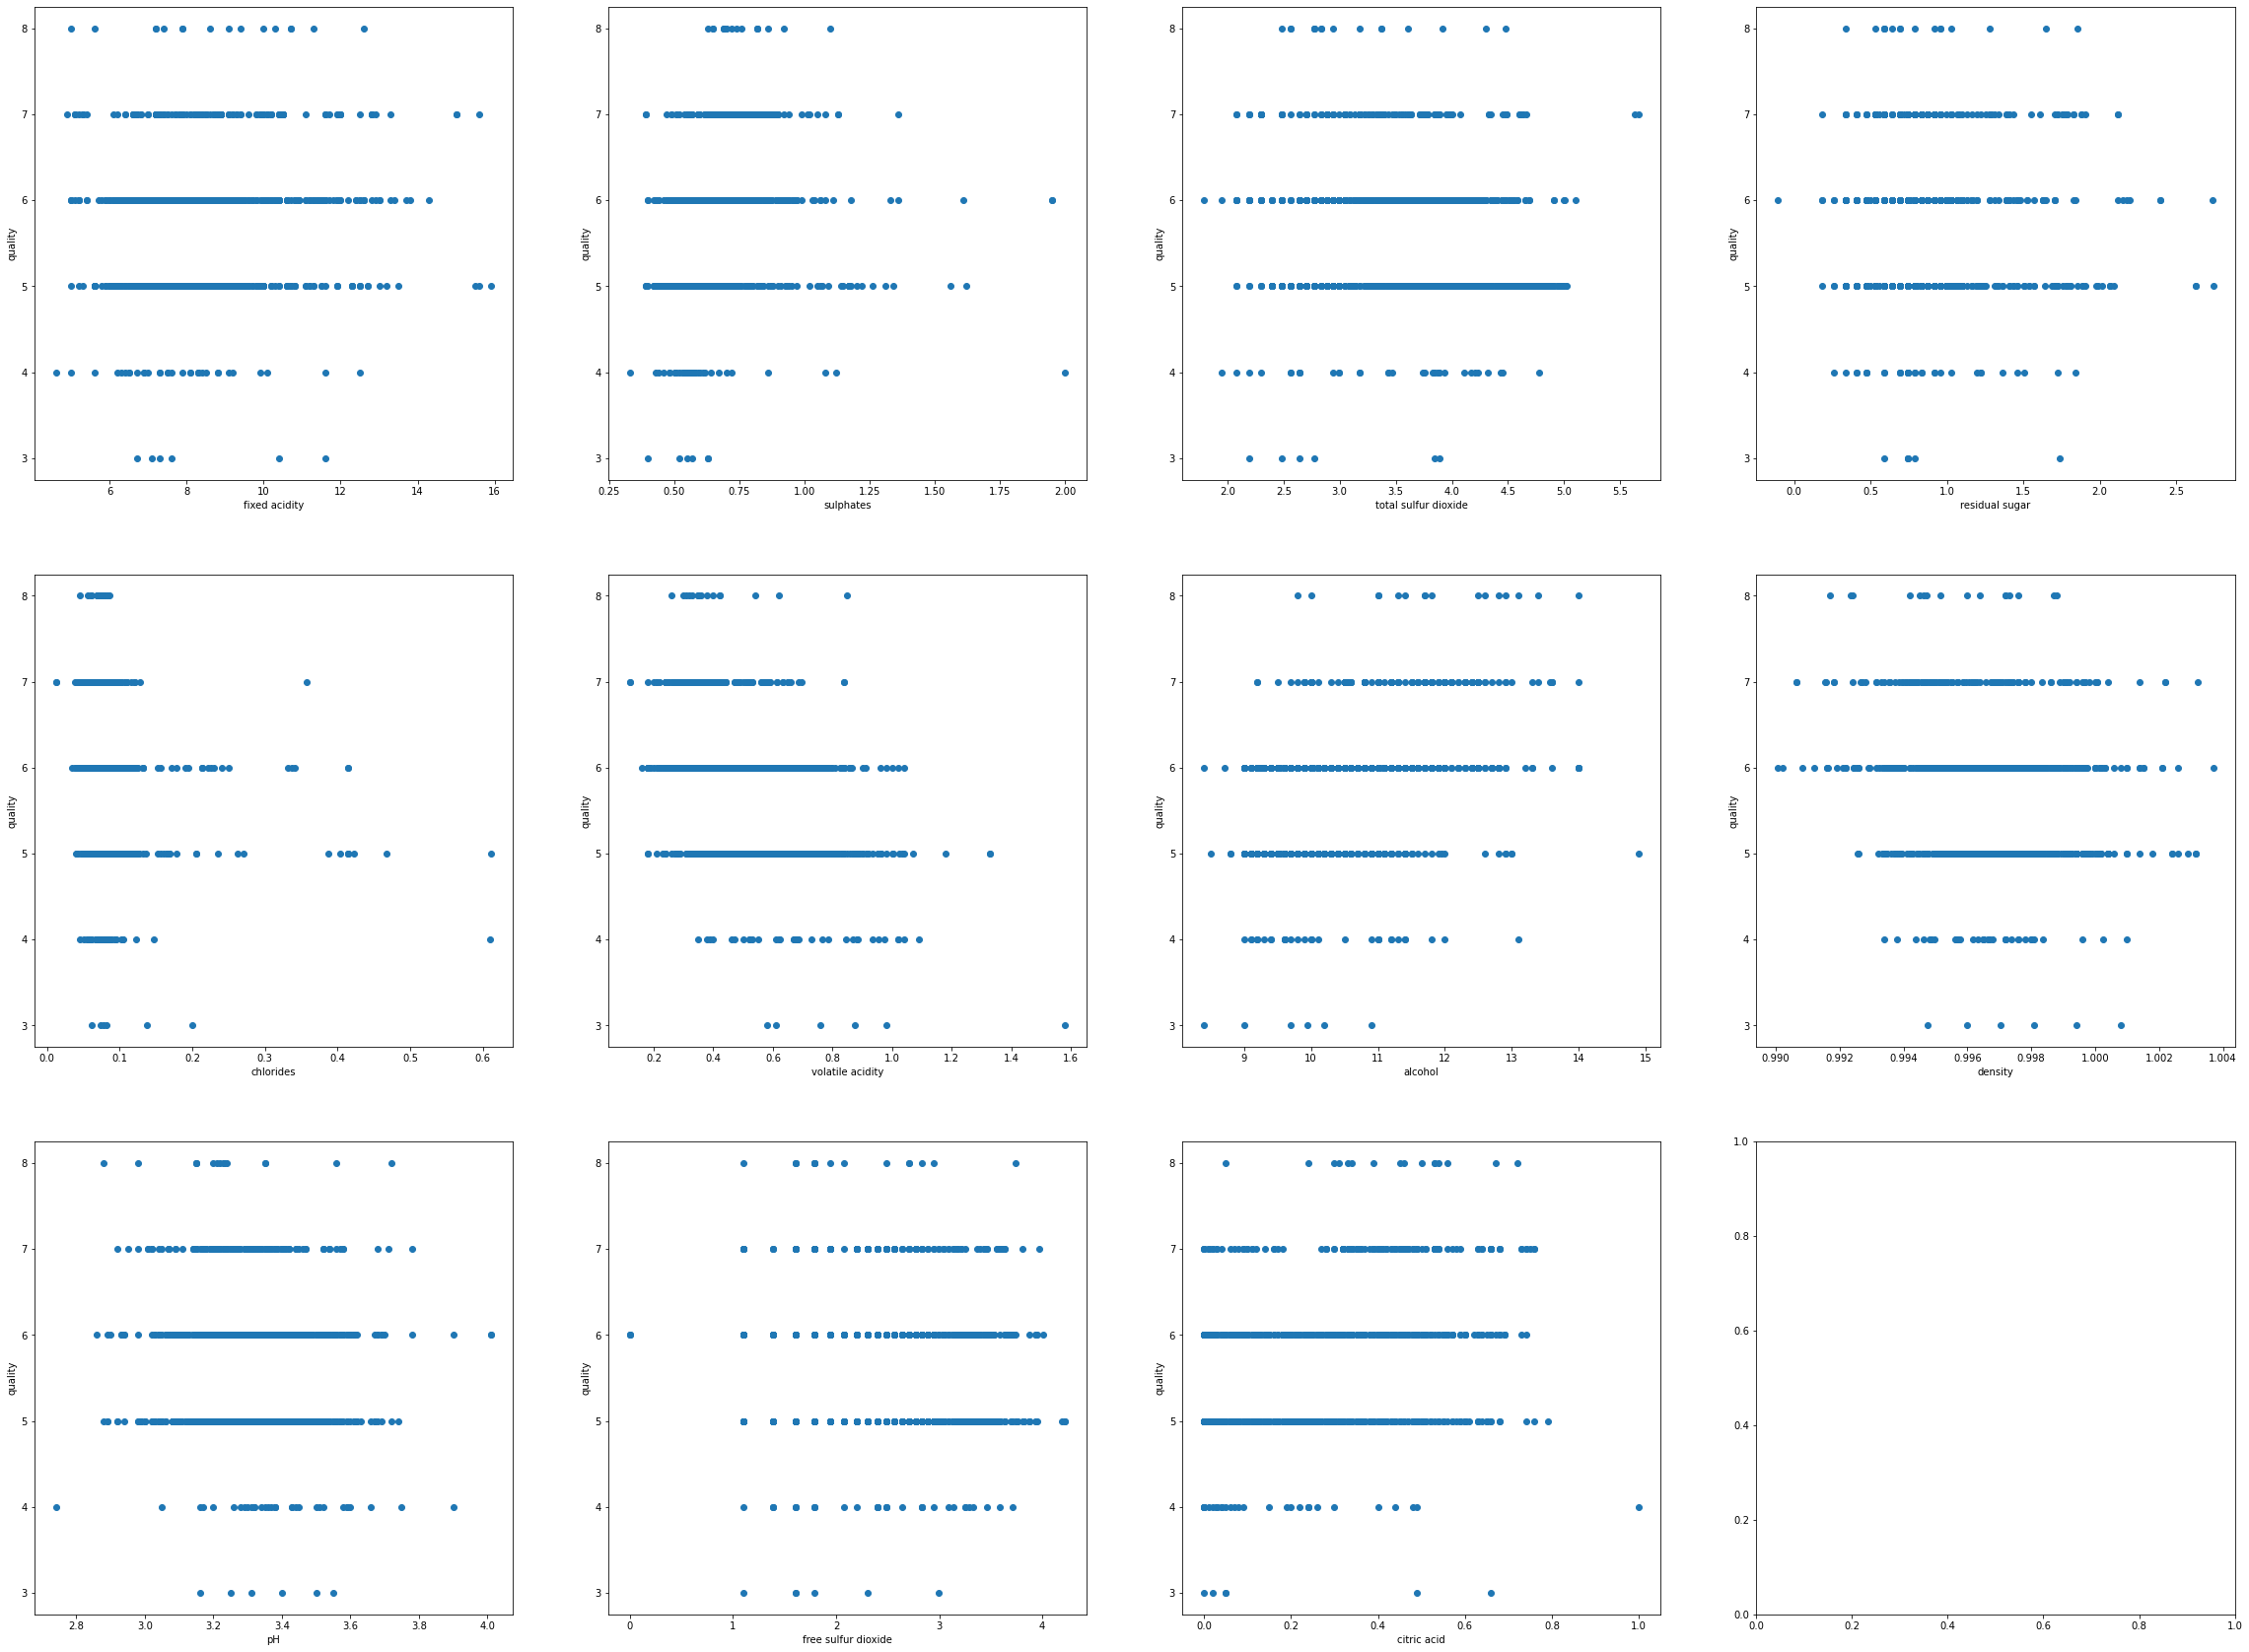

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(40, 30))
for n in range(11):
    i = n % 3
    j = n % 4
    ax[i, j].scatter(df.iloc[:, n], df['quality'])
    ax[i, j].set_xlabel(df.columns[n])
    ax[i, j].set_ylabel('quality')

<AxesSubplot:>

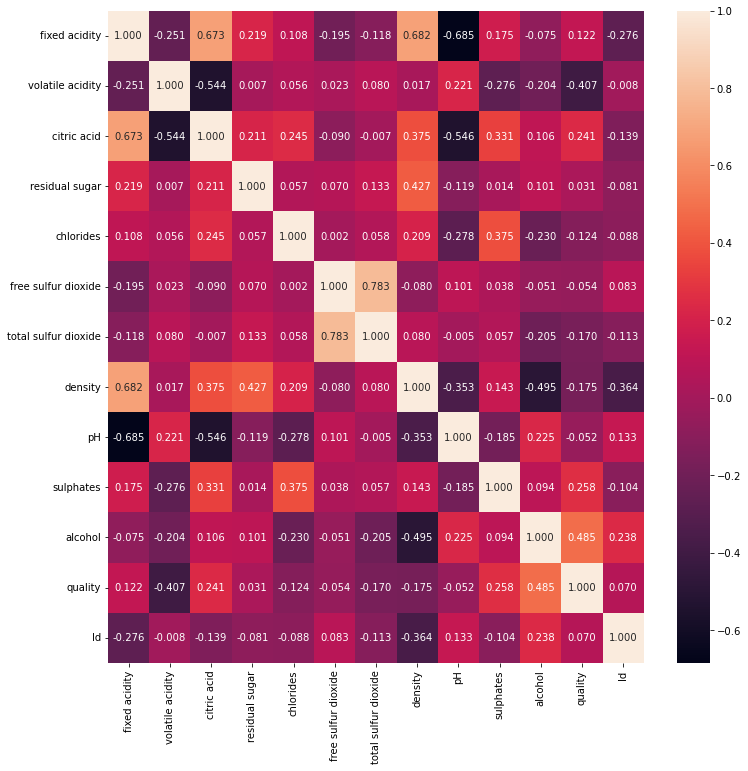

In [38]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.3f')

In [39]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[: , :-2]
y = df['quality']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-0.52157961  0.93933222 -1.36502663 ...  1.27069495 -0.57365783
  -0.96338181]
 [-0.29259344  1.94181282 -1.36502663 ... -0.70892755  0.1308811
  -0.59360107]
 [-0.29259344  1.27349242 -1.16156762 ... -0.32577481 -0.04525363
  -0.59360107]
 ...
 [-1.20853813  0.38239855 -0.9581086  ...  0.88754221 -0.45623467
   0.05351522]
 [-1.38027776  0.10393172 -0.8563791  ...  1.33455374  0.60057372
   0.70063152]
 [-1.38027776  0.6330187  -0.75464959 ...  1.65384769  0.30701583
  -0.22382033]]


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, train_size=0.9, shuffle=True)


# Classification

In [45]:
from sklearn.svm import LinearSVC

C = 0.1 # paramètre de régularisation
classification = LinearSVC(C=C, max_iter=10000)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.6173913043478261

In [46]:
from sklearn.svm import SVC

C = 0.1 # paramètre de régularisation
classification = SVC(C=C, max_iter=10000)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.5565217391304348

In [47]:
from sklearn.neighbors import KNeighborsClassifier

classification = KNeighborsClassifier()
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.5652173913043478

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

classification = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.5304347826086957

# Regression